# <font color=steelblue>DS-03 Data Science und künstliche Intelligenz</font>

## <font color=grey>Beispiel Kundenabwanderung in einem Telekommunikationsunternehmen</font>

Ein Mobilfunkanbieter möchte wissen, weshalb Kunden abwandern. Dazu wurde ein Data-Science-Projekt im Unternehmen initiiert.

Im ersten Schritt hatten wir uns dazu die einzelnen Phasen im CRIP_DM Modell angeschaut und die erste Phase des Business Understanding gemeinsam abgeschlossen, nun wollen wir uns an die konkrete Umsetzung machen.


### <font color=grey>Data Preparation - Vorbereiten der Daten für die Modellierung / Feature Engineering</font></font>

Notwendige Bibliotheken laden:

In [1]:
flagShowFigures = False

In [2]:
#In der online Variante müssen die folgenden Bibliotheken virtuell nachinstalliert werden
#import piplite
#await piplite.install('seaborn')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

Jetzt können wir die Daten laden (vorausgesetzt, die Datei WA_Fn-UseC_-Telco-Customer-Churn.csv befindet sich im aktuellen Verzeichnis):

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn - modifiziert.csv')

Zunächst ein schneller Überblick über die ersten Zeilen:

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In der letzten Spalte sehen wir, ob der Kunde im letzten Monat gekündigt hat.

Beginnen wir mit dem Feature Engineering:

### Feature Engineering

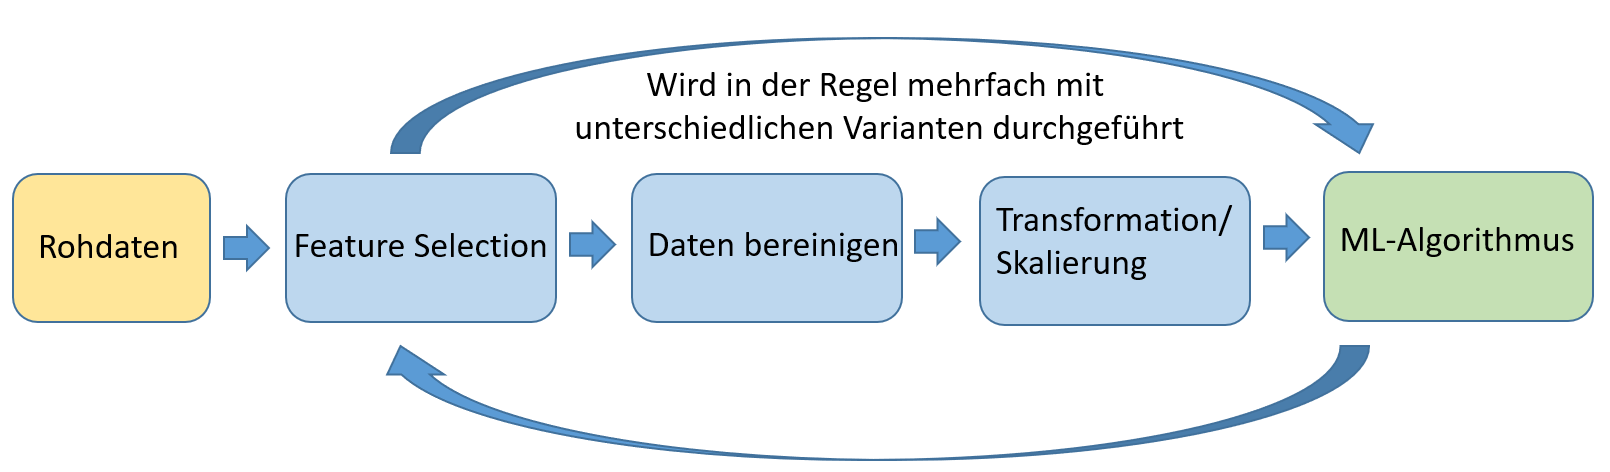



#### Schritt 1: Feature Selection

* Welche Features sollten wir verwenden, welche nicht?
* Gibt es weitere Features, die interessant sein könnten?
* Können wir Informationen zusammenfassen?

Vorschlag: Wir könnten aus *tenure* und *MonthlyCharges* noch eine Prüfvariable für *TotalCharges* berechnen.

In [6]:
idx = df.columns.get_loc('TotalCharges')
df.insert(idx+1, 'CalculatedTotalCharges', df.MonthlyCharges * df.tenure)


In [7]:
if flagShowFigures:
    plt.rcParams["figure.figsize"] = (12,12)
    fig, ax = plt.subplots()


    ax.scatter(x=df.CalculatedTotalCharges, y=df.TotalCharges, s=1)
    ax.set(title="TotalCharges vs. CalculatedTotalCharges")

    plt.show()


---
#### Schritt 2: Daten bereinigen

Wir müssen nun die Daten um fehlende Werte und Außreißer bereinigen.

Erinnern wir uns:
Die Spalten *SeniorCitizen* und *TotalCharges* enthalten ungültige oder fehlende Werte.

Wie gehen wir mit diesen Werten um?




In [8]:
df[df['tenure'] == 0].index


Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [9]:
df[np.isnan(df['TotalCharges'])].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [10]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CalculatedTotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0.0,No
753,3115-CZMZD,Male,,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0.0,No
1082,4367-NUYAO,Male,,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0.0,No


Umgang fehlende Werte:

Daten mit Mittelwert füllen:
df.fillna(df["TotalCharges"].mean())

Entsprechende Zeilen löschen:
df.drop(labels=df[np.isnan(df['TotalCharges'])].index, axis=0, inplace=True)
df1 = np.delete(df, df[np.isnan(df['TotalCharges'])].index, axis=0)


In [11]:
list2delete = df[np.isnan(df['TotalCharges'])].index
list2delete

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [12]:
df.drop(labels=list2delete, axis=0, inplace=True)

In [13]:
df[np.isnan(df['TotalCharges'])]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CalculatedTotalCharges,Churn


---
#### Schritt 3: Transformation / Skalierung / Standardisierung

* Zunächst müssen wir entscheiden, was wir mit den Text-Features machen.
* Außerdem müssen wir uns sie Wertebereiche der numerischen Werte anschauen und diese ggf. skalieren oder standardisieren.

1. Text-Features in Werte umwandeln:

In [14]:
def object_to_int(data_series):
    if data_series.dtype=='object':
        data_series = LabelEncoder().fit_transform(data_series)
    return data_series

In [15]:
dfScalar = df.apply(lambda x: object_to_int(x))
dfScalar.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CalculatedTotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,29.85,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,56.95,1889.50,1936.30,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,53.85,108.15,107.70,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,42.30,1840.75,1903.50,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,70.70,151.65,141.40,1


---
2. Skalen der numerischen Werte anschauen:

In [16]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(15,5))
    plt.title("Verteilung von {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [17]:
num_cols = ["SeniorCitizen", "tenure", 'MonthlyCharges', 'TotalCharges', 'CalculatedTotalCharges']
if flagShowFigures:
    for feat in num_cols: distplot(feat, dfScalar)

Standardizierung von *tenure*, *MonthlyCharges*, *TotalCharges*

In [18]:
selectedColumns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'CalculatedTotalCharges']


In [19]:
dfScalar[selectedColumns] = StandardScaler().fit_transform(dfScalar[selectedColumns])

In [20]:
if flagShowFigures:
    for feat in selectedColumns: distplot(feat, dfScalar[selectedColumns])

Jetzt speichern wir die bereinigten Daten:

In [21]:
dfScalar

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CalculatedTotalCharges,Churn
0,5365,0,0,1,0,-1.280248,0,1,0,0,...,0,0,0,0,1,2,-1.161694,-0.994194,-0.995034,0
1,3953,1,0,0,0,0.064303,1,0,0,2,...,0,0,0,1,0,3,-0.260878,-0.173740,-0.153164,0
2,2558,1,0,0,0,-1.239504,1,0,0,2,...,0,0,0,0,1,3,-0.363923,-0.959649,-0.960656,1
3,5524,1,0,0,0,0.512486,0,1,0,2,...,2,0,0,1,0,0,-0.747850,-0.195248,-0.167649,0
4,6500,0,0,0,0,-1.239504,1,0,1,0,...,0,0,0,0,1,2,0.196178,-0.940457,-0.945775,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,0,1,1,-0.343137,1,2,0,2,...,2,2,2,1,1,3,0.664868,-0.129180,-0.109491,0
7039,1524,0,0,1,1,1.612573,1,2,1,0,...,0,2,2,1,1,1,1.276493,2.241056,2.272977,0
7040,3358,0,0,1,1,-0.872808,0,1,0,2,...,0,0,0,0,1,2,-1.170004,-0.854514,-0.864434,0
7041,5923,1,1,1,0,-1.158016,1,2,1,0,...,0,0,0,0,1,3,0.319168,-0.872095,-0.876798,1


In [22]:
dfScalar.to_csv('CleanedData4ML.csv')

Fertig!